In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [8]:
df_train = pd.read_csv("train.csv")

In [9]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [10]:
import pandas_profiling

#pandas_profiling.ProfileReport(df_train)

* 

In [11]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

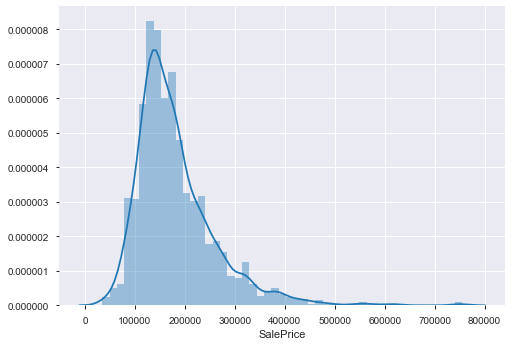

In [12]:
#histogram
sns.distplot(df_train['SalePrice'])

In [13]:
print("Skewness: {}".format(df_train["SalePrice"].skew()))
print("Kurtosis: {}".format(df_train["SalePrice"].kurt()))

Skewness: 1.8828757597682129
Kurtosis: 6.536281860064529


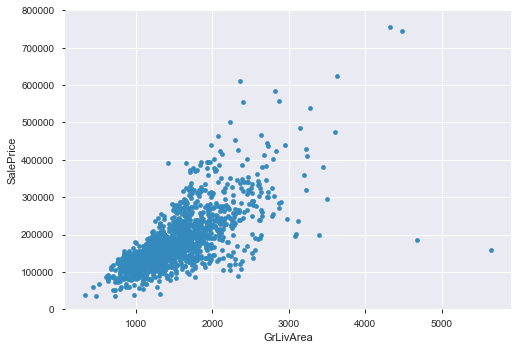

In [14]:
var1 = 'GrLivArea';
data = pd.concat([df_train["SalePrice"],df_train[var1]], axis=1)
data.plot.scatter(x=var1, y="SalePrice", ylim=(0,800000))

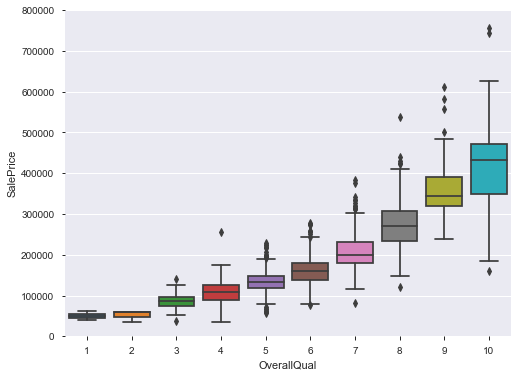

In [15]:
var2 = "OverallQual"
data = pd.concat([df_train["SalePrice"],df_train[var2]], axis=1)
plt.subplots(figsize=(8,6))
fig = sns.boxplot(x=var2, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

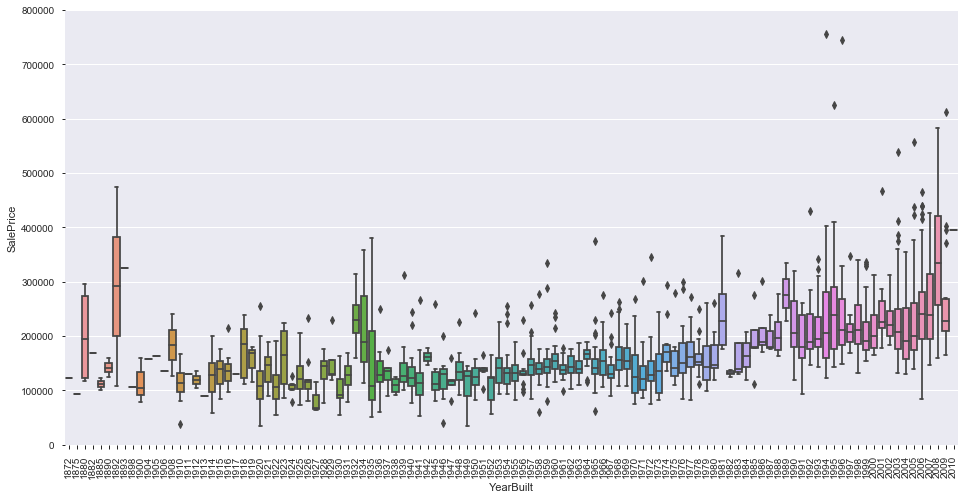

In [16]:
var3 = 'YearBuilt'
data = pd.concat([df_train['SalePrice'],df_train[var3]], axis=1)
plt.subplots(figsize=(16,8))
fig = sns.boxplot(x=var3, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000)
plt.xticks(rotation=90);

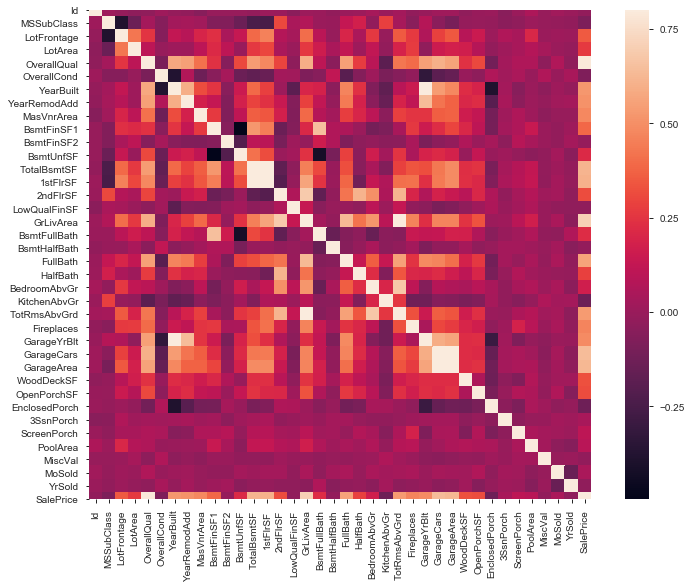

In [17]:
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.8, square = True)

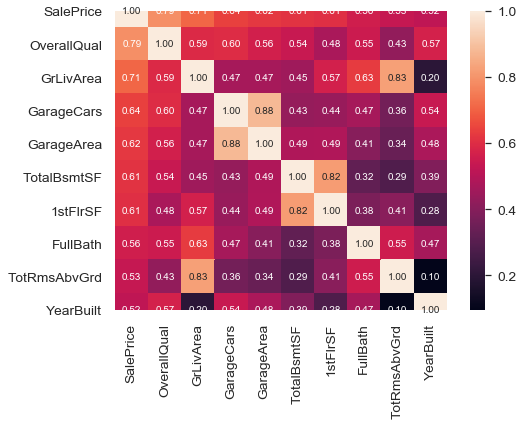

In [18]:
## Extract data by the most correlated variables.

n = 10; # number of variables for heatmap
cols = corrmat.nlargest(n,'SalePrice')['SalePrice'].index #index로 빼낸다음
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
sns.heatmap(cm, cbar=True, annot=True, square = True, fmt='.2f', annot_kws={'size': 10},\
           yticklabels=cols.values, xticklabels=cols.values)
plt.show()

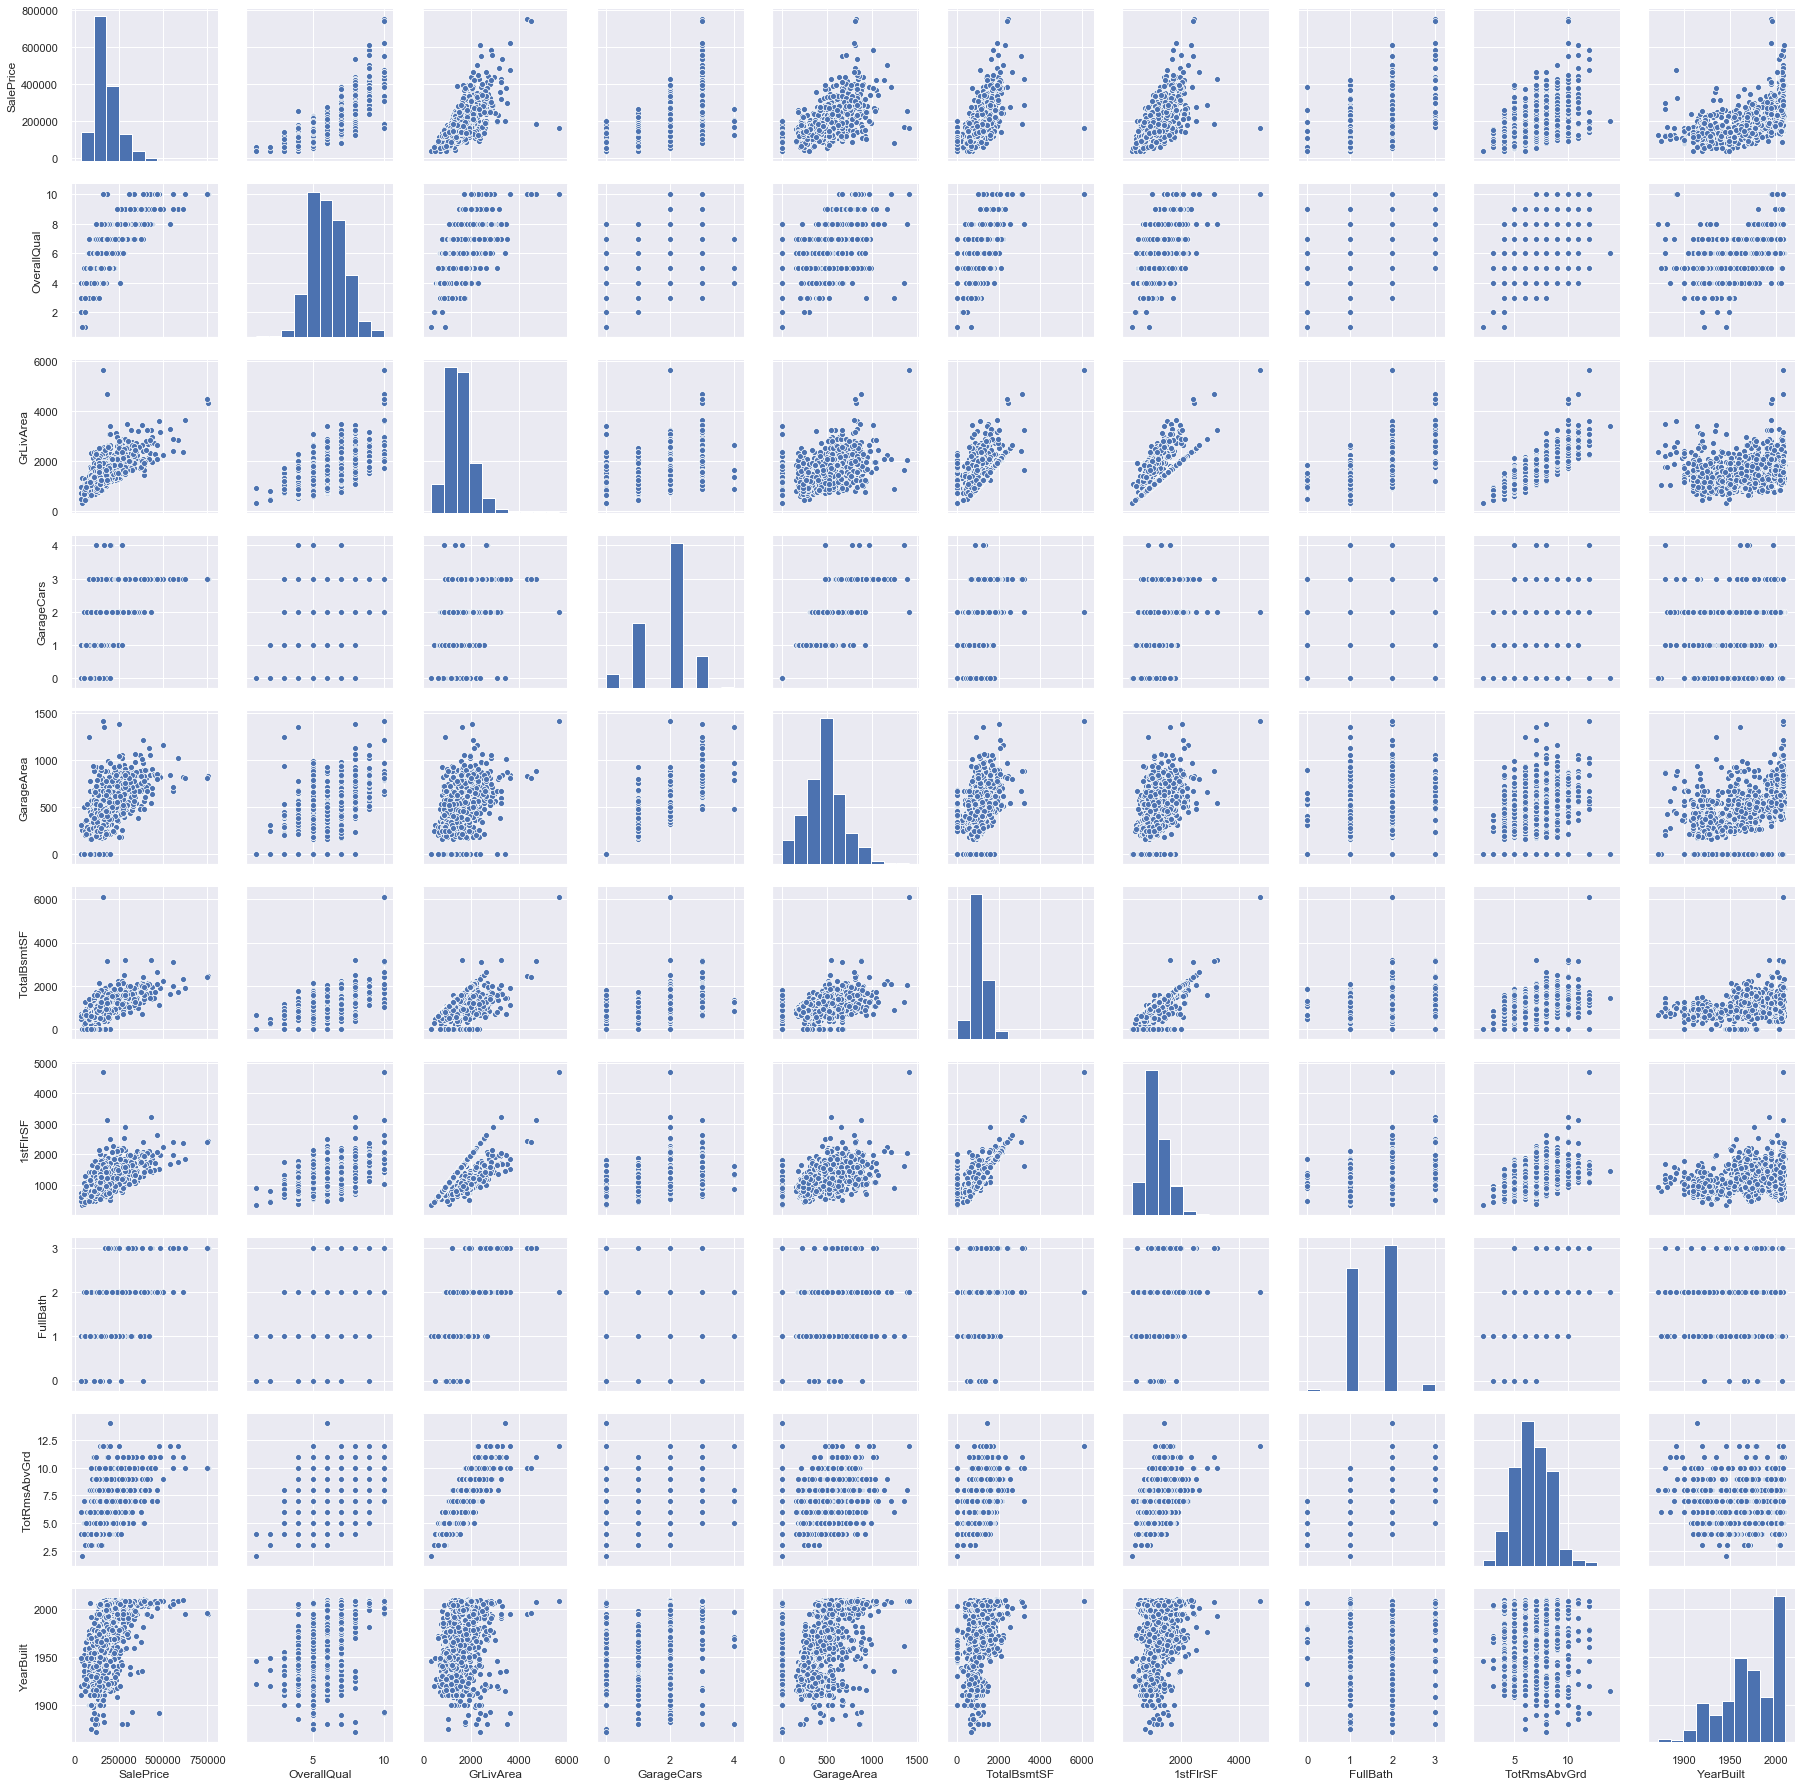

In [19]:
# Let's proceed to the scatter plots.
corrmat = df_train.corr()
vars = corrmat.nlargest(n,'SalePrice')['SalePrice'].index.values
sns.set()
sns.pairplot(df_train[vars], size=2.5)
plt.show()

In [20]:
# missing data count + percentage
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
miss_data = pd.concat([total, percent], axis=1, keys=['total','percent'])
miss_data.head(20)

,total,percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [27]:
#dealing with missing data
#1. drop all other variables with missing values
df_train = df_train.drop(miss_data[miss_data['total']>1].index.values,axis=1) 
#2. drop 'Electrical'
df_train = df_train.drop(df_train.loc[df_train['Electrical'].isnull()].index)

In [29]:
# check if there's no missing data missing
df_train.isnull().sum().max()

0

In [38]:
# Out liars

#Univariate analysis: In this context, data standardization means converting data values to have mean of 0 and a standard deviation of 1.
#standardizing data
saleprice_scaled = StandardScaler().fit_transform(df_train['SalePrice'][:,np.newaxis]);
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


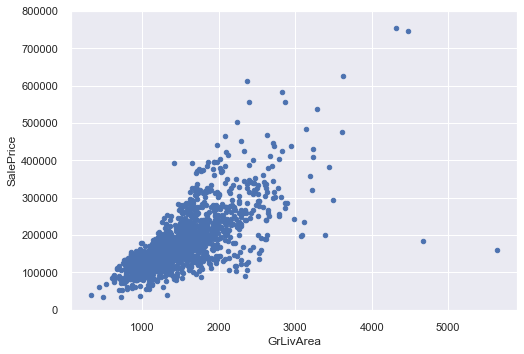

In [54]:
# Bivariate analysis
var = "GrLivArea"
data=pd.concat([df_train['SalePrice'],df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim = (0,800000))

In [63]:
#Deleting Points
df_train.sort_values(by="GrLivArea", ascending =False)[:2]
df_train=df_train.drop(df_train[df_train['Id']==1299].index)
df_train=df_train.drop(df_train[df_train['Id']==524].index)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


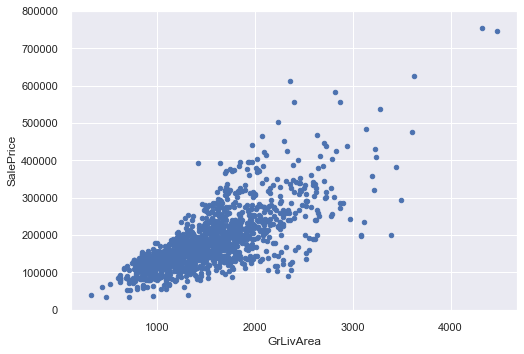

In [64]:
# Bivariate analysis
var = "GrLivArea"
data=pd.concat([df_train['SalePrice'],df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim = (0,800000))

In [ ]:
# ###
# According to Hair et al. (2013), four assumptions should be tested:

# Normality - When we talk about normality what we mean is that the data should look like a normal distribution. This is important because several statistic tests rely on this (e.g. t-statistics). In this exercise we'll just check univariate normality for 'SalePrice' (which is a limited approach). Remember that univariate normality doesn't ensure multivariate normality (which is what we would like to have), but it helps. Another detail to take into account is that in big samples (>200 observations) normality is not such an issue. However, if we solve normality, we avoid a lot of other problems (e.g. heteroscedacity) so that's the main reason why we are doing this analysis.

# Homoscedasticity - I just hope I wrote it right. Homoscedasticity refers to the 'assumption that dependent variable(s) exhibit equal levels of variance across the range of predictor variable(s)' (Hair et al., 2013). Homoscedasticity is desirable because we want the error term to be the same across all values of the independent variables.

# Linearity- The most common way to assess linearity is to examine scatter plots and search for linear patterns. If patterns are not linear, it would be worthwhile to explore data transformations. However, we'll not get into this because most of the scatter plots we've seen appear to have linear relationships.

# Absence of correlated errors - Correlated errors, like the definition suggests, happen when one error is correlated to another. For instance, if one positive error makes a negative error systematically, it means that there's a relationship between these variables. This occurs often in time series, where some patterns are time related. We'll also not get into this. However, if you detect something, try to add a variable that can explain the effect you're getting. That's the most common solution for correlated errors.
# ###

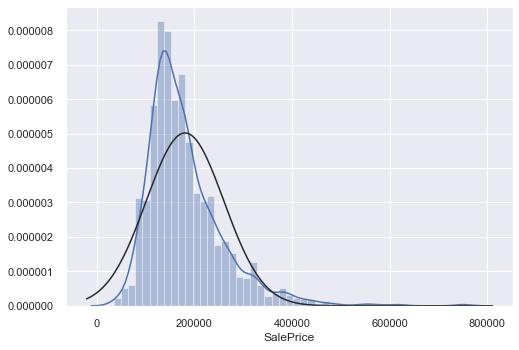

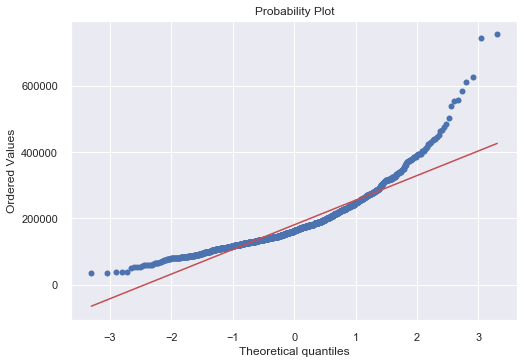

In [68]:
#1.In the search for normality
sns.distplot(df_train['SalePrice'], fit=norm);
fig=plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)
#It shows 'peakedness', positive skewness and does not follow the diagonal line.

In [69]:
# Applying log transformation
#df_train['SalePrice']
np.log(df_train['SalePrice'])

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
          ...    
1455    12.072541
1456    12.254863
1457    12.493130
1458    11.864462
1459    11.901583
Name: SalePrice, Length: 1457, dtype: float64

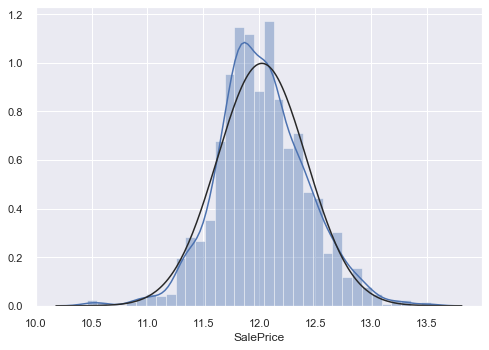

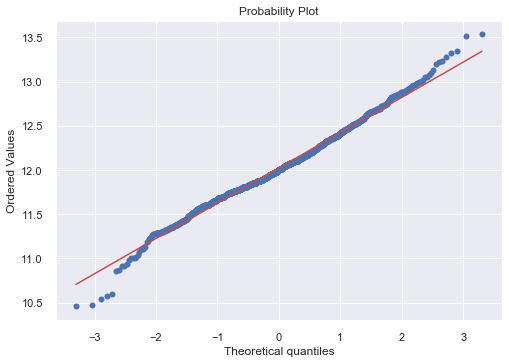

In [70]:
sns.distplot(np.log(df_train['SalePrice']), fit=norm);
fig=plt.figure()
res = stats.probplot(np.log(df_train['SalePrice']), plot=plt)
#It shows 'peakedness', positive skewness and does not follow the diagonal line.

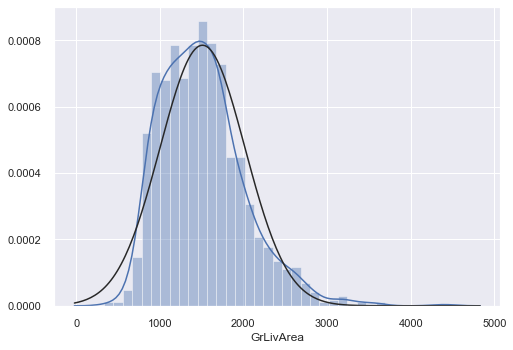

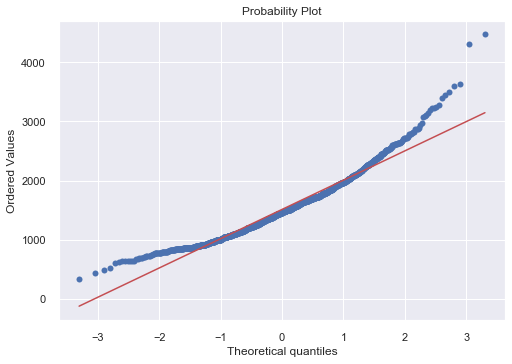

In [73]:
# Check what's going on with "GrLivArea"
sns.distplot(df_train["GrLivArea"], fit=norm)
fig= plt.figure()
res= stats.probplot(df_train["GrLivArea"], plot=plt)

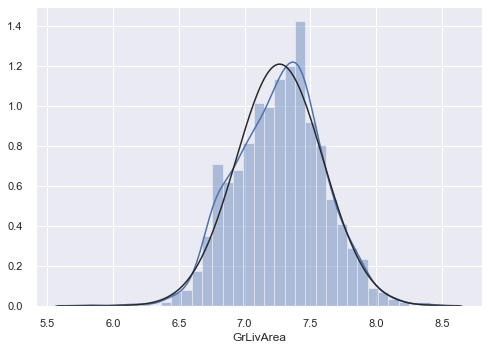

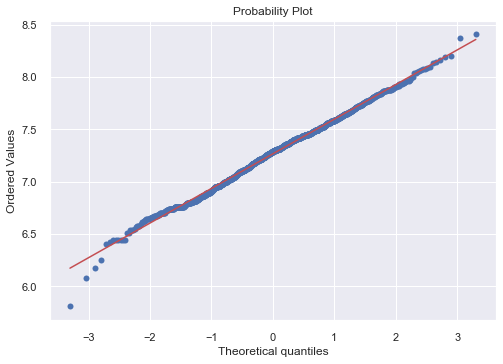

In [74]:
#log
sns.distplot(np.log(df_train["GrLivArea"]), fit=norm)
fig= plt.figure()
res= stats.probplot(np.log(df_train["GrLivArea"]), plot=plt)

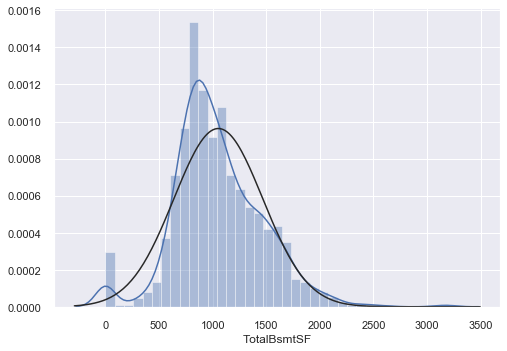

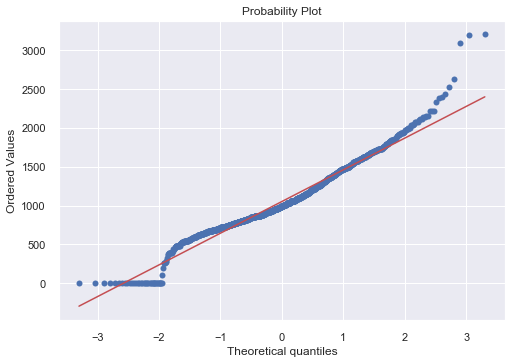

In [76]:
# Check what's going on with "TotalBsmtSF"
sns.distplot(df_train["TotalBsmtSF"], fit=norm)
fig= plt.figure()
res = stats.probplot(df_train["TotalBsmtSF"], plot=plt)

In [88]:
#A big problem because the value zero doesn't allow us to do log transformations.
#To apply a log transformation here, we'll create a variable that can get the effect of having or not having basement (binary variable). Then, we'll do a log transformation to all the non-zero observations, ignoring those with value zero. This way we can transform data, without losing the effect of having or not basement.
#create column for new variable (one is enough because it's a binary categorical feature)
#if area>0 it gets 1, for area==0 it gets 0

df_train['HasBsmt'] = pd.Series(len(df_train['TotalBsmtSF']),index=df_train.index)
df_train['HasBsmt'] = 0
df_train.loc[df_train['TotalBsmtSF']>0,'HasBsmt'] =1

In [89]:
# Transform data into log data
df_train.loc[df_train['HasBsmt']==1,'TotalBsmtSF'] = np.log(df_train['TotalBsmtSF'])

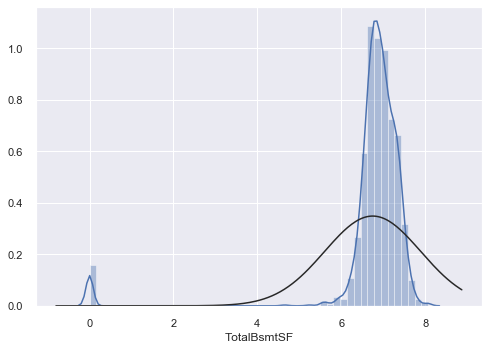

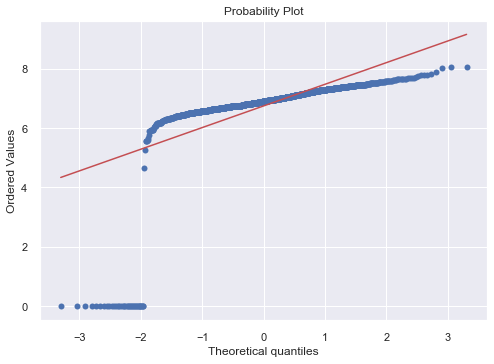

In [90]:
# This is wrong
# Check what's going on with "TotalBsmtSF"
sns.distplot(df_train["TotalBsmtSF"], fit=norm)
fig= plt.figure()
res = stats.probplot(df_train["TotalBsmtSF"], plot=plt)

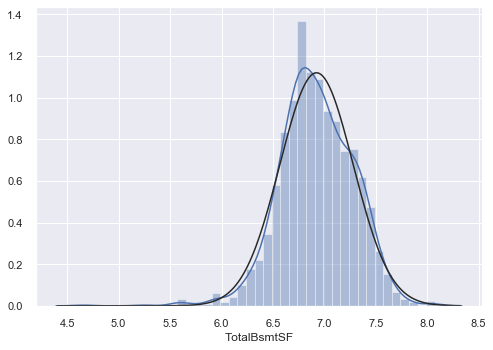

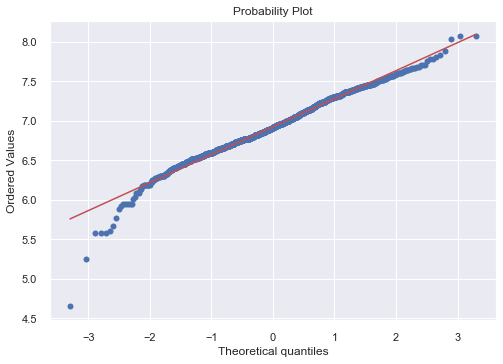

In [93]:
sns.distplot(df_train[df_train["TotalBsmtSF"]>0]['TotalBsmtSF'], fit=norm)
fig= plt.figure()
res = stats.probplot(df_train[df_train["TotalBsmtSF"]>0]['TotalBsmtSF'], plot=plt)